## Question 2

In [1]:
σcarbon = .0031e-24
σwater = .5896e-24
σheavy = .0013e-24

σ_f = 582.6e-24
σ_cap_235 = 98.8e-24

ρcarbon = 1
ρwater =1
ρheavy =1 


mods = [[σcarbon],[σwater], [σheavy]]

mods[0][0]

k =1 
v = 2.6
for cross in mods:
    #print(cross[0])
    R = v*(σ_f/cross[0])-σ_cap_235/cross[0]
    print(1/R)
    

2.1893273821294384e-06
0.00041639594338823126
9.18105031215571e-07


## Plotting for Question 5

In [2]:
import matplotlib.pyplot as plt
import numpy as np

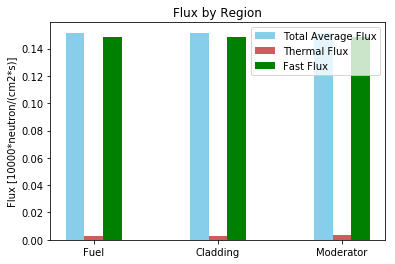

In [3]:
total =  (1.51250e-01, 1.51591E-01, 1.51588E-01)
thermal = (2.46509E-03, 2.97126E-03, 3.36391E-03)
fast = (1.48731E-01, 1.48567E-01, 1.48172E-01)

ind = np.arange(len(total))  # the x locations for the groups
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, total, width, color='SkyBlue', label='Total Average Flux')
rects2 = ax.bar(ind, thermal, width, color='IndianRed', label='Thermal Flux')
rects3 = ax.bar(ind + width, fast, width, color='Green', label='Fast Flux')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax.set_title('Flux by Region')
ax.set_xticks(ind)
ax.set_xticklabels(('Fuel', 'Cladding', 'Moderator'))
ax.legend()
plt.savefig('q5_flux.jpg')



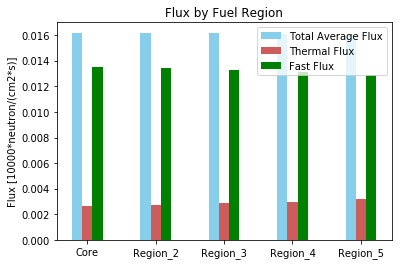

In [4]:
total6 =  (1.61809e-02, 1.61690e-02, 1.61309e-02, 1.60925e-02, 1.60389e-02)
thermal6 = (2.66372e-03, 2.76299e-03, 2.86679e-03, 2.99604e-03, 3.16416e-03)
fast6 = (1.35076e-02, 1.33967e-02, 1.32550e-02, 1.30875e-02, 1.28662e-02)

ind2 = np.arange(len(total6))  # the x locations for the groups
width = 0.15  # the width of the bars

fig2, ax2 = plt.subplots()
rects11 = ax2.bar(ind2 - width, total6, width, color='SkyBlue', label='Total Average Flux')
rects12 = ax2.bar(ind2, thermal6, width, color='IndianRed', label='Thermal Flux')
rects13 = ax2.bar(ind2 + width, fast6, width, color='Green', label='Fast Flux')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax2.set_title('Flux by Fuel Region')
ax2.set_xticks(ind2)
ax2.set_xticklabels(('Core', 'Region_2', 'Region_3', 'Region_4', 'Region_5'))
ax2.legend()
plt.savefig('q6_flux.jpg')

In [5]:
with open('outputs/single_pin_6/outp') as f:
    text_block = f.readlines()[3200:3219]

In [6]:
(text_block)
        

['    1.0000E-08   9.08496E-05 0.0035\n',
 '    2.0000E-08   2.79037E-04 0.0022\n',
 '    3.0000E-08   3.87141E-04 0.0020\n',
 '    4.0000E-08   4.18932E-04 0.0019\n',
 '    5.0000E-08   4.04589E-04 0.0020\n',
 '    6.0000E-08   3.61085E-04 0.0021\n',
 '    7.0000E-08   3.08924E-04 0.0023\n',
 '    8.0000E-08   2.56324E-04 0.0026\n',
 '    9.0000E-08   2.10936E-04 0.0028\n',
 '    1.0000E-07   1.72924E-04 0.0032\n',
 '    7.7426E-07   1.20315E-03 0.0014\n',
 '    5.9948E-06   7.40602E-04 0.0019\n',
 '    4.6416E-05   6.54919E-04 0.0020\n',
 '    3.5938E-04   7.34428E-04 0.0019\n',
 '    2.7826E-03   7.80710E-04 0.0019\n',
 '    2.1544E-02   8.40578E-04 0.0019\n',
 '    1.6681E-01   1.21036E-03 0.0016\n',
 '    1.2915E+00   3.45875E-03 0.0010\n',
 '    1.0000E+01   3.59909E-03 0.0012\n']

In [7]:
import itertools

def clean_up(text):
    '''
    The text returned from BeatifulSoup had extra markups that we remove with the replace list. The data also has
    trace ('T') values for precip, so I assume that amount is 0.0 and replace all trace values.
    '''
    
    replace_list = ['  ', '\n', '   ']
    for r in replace_list:
        text = text.replace(r, '')
        text_final = text.replace('E', "e")
    return text_final

In [8]:
cleaned = []
for l in range(len(text_block)):
    c_line = text_block[l]
    clean_line = clean_up(c_line)
    cleaned.append(clean_line)
plot_data = []
for line in cleaned:
    numbers_str = line.split()
    num_float = [float(x) for x in numbers_str]
    plot_data.append(num_float)
plot_data

[[1e-08, 9.08496e-05, 0.0035],
 [2e-08, 0.000279037, 0.0022],
 [3e-08, 0.000387141, 0.002],
 [4e-08, 0.000418932, 0.0019],
 [5e-08, 0.000404589, 0.002],
 [6e-08, 0.000361085, 0.0021],
 [7e-08, 0.000308924, 0.0023],
 [8e-08, 0.000256324, 0.0026],
 [9e-08, 0.000210936, 0.0028],
 [1e-07, 0.000172924, 0.0032],
 [7.7426e-07, 0.00120315, 0.0014],
 [5.9948e-06, 0.000740602, 0.0019],
 [4.6416e-05, 0.000654919, 0.002],
 [0.00035938, 0.000734428, 0.0019],
 [0.0027826, 0.00078071, 0.0019],
 [0.021544, 0.000840578, 0.0019],
 [0.16681, 0.00121036, 0.0016],
 [1.2915, 0.00345875, 0.001],
 [10.0, 0.00359909, 0.0012]]

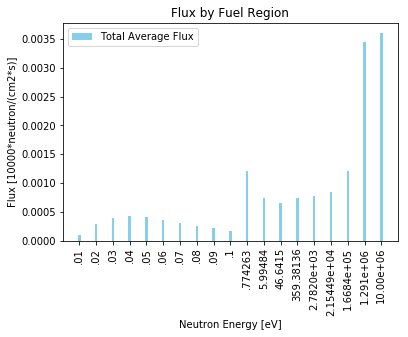

In [13]:
energy_x = []
for nrg in range(len(plot_data)):
    EE = plot_data[nrg][0]
    energy_x.append(EE)
flux_y =[]
for f in range(len(plot_data)):
    flux = plot_data[f][1]
    flux_y.append(flux)

width = 0.15  # the width of the bars
x_pos = np.linspace(0, 19, 19)
fig3, ax3 = plt.subplots()
ax3.bar(x_pos, flux_y, width, color='SkyBlue', label='Total Average Flux')

ax3.set_xticks(x_pos)
plt.xticks(rotation='vertical')
ax3.set_xticklabels(('.01', '.02', '.03', '.04', '.05', '.06', '.07', '.08', '.09', '.1',
                     '.774263', '5.99484', '46.6415', '359.38136', '2.7820e+03', '2.15449e+04', '1.6684e+05',
                       '1.291e+06', '10.00e+06'))
ax3.set_ylabel('Flux [10000*neutron/(cm2*s)]')
ax3.set_xlabel('Neutron Energy [eV]')
ax3.set_title('Flux by Fuel Region')
#ax3.set_ylim(0, .1)

ax3.legend()
plt.savefig('q6_nrg_distro.jpg')

In [10]:
geo = np.geomspace(.1, 10e6, 10)
geo/1e6

array([1.00000000e-07, 7.74263683e-07, 5.99484250e-06, 4.64158883e-05,
       3.59381366e-04, 2.78255940e-03, 2.15443469e-02, 1.66810054e-01,
       1.29154967e+00, 1.00000000e+01])

In [11]:
geo

array([1.00000000e-01, 7.74263683e-01, 5.99484250e+00, 4.64158883e+01,
       3.59381366e+02, 2.78255940e+03, 2.15443469e+04, 1.66810054e+05,
       1.29154967e+06, 1.00000000e+07])

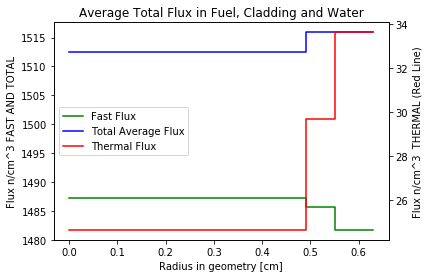

In [12]:
n_neutron = 10000

th_fuel = 2.46509e-3
fast_fuel = 1.48731e-1
total_fuel = 1.51250e-1

th_clad = 2.97126e-3
fast_clad = 1.48567e-1
total_clad = 1.51591e-1

th_mod= 3.36391e-3
fast_mod = 1.48172e-1
total_mod = 1.51588e-1


x = [0, .49, .55, .63] 
thermal = [th_fuel*n_neutron, th_fuel*n_neutron, th_clad*n_neutron, th_mod*n_neutron]
fast = [fast_fuel*n_neutron, fast_fuel*n_neutron, fast_clad*n_neutron, fast_mod*n_neutron]
total = [total_fuel*n_neutron, total_fuel*n_neutron, total_clad*n_neutron, total_mod*n_neutron]

#plt.yrange(270, )
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()
plt.title('Average Total Flux in Fuel, Cladding and Water', fontsize=12)

ax1.set_xlabel('Radius in geometry [cm]',fontsize=10)
ax2.set_ylabel('Flux n/cm^3  THERMAL (Red Line)',fontsize=10)
ax1.set_ylabel('Flux n/cm^3 FAST AND TOTAL',fontsize=10)

th_plt = ax2.step(x, thermal, label='Thermal Flux', color='r')
fst_plot = ax1.step(x, fast, label='Fast Flux', color='g')
total_plot = ax1.step(x, total, label='Total Average Flux', color='b')

lines = fst_plot+total_plot+th_plt
labels = [l.get_label() for l in lines]
legend = ax1.legend(lines, labels, loc='center left', fontsize=10)

#plt.savefig('q5_c_flux.jpg')
plt.show()